## TP3

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import decomposition
from sklearn.linear_model import LinearRegression, Ridge, LassoCV
from sklearn.preprocessing import StandardScaler
import seaborn as sns
%load_ext blackcellmagic
%matplotlib inline

### (Q1) 
Importer la base de données data_dm3.csv disponible depuis le lien https://bitbucket.org/portierf/shared_files/downloads/data_dm3.csv. La dernière colonne est la variable à expliquer.
Les autres colonnes sont les variables explicatives. Préciser le nombre de variables explicatives
et le nombre d’observations.

In [2]:
df = pd.read_csv('https://bitbucket.org/portierf/shared_files/downloads/data_dm3.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,201,202,203,204,205,206,207,208,209,210
0,-1.298173,-0.162249,1.223379,1.355554,1.080171,0.634979,0.298741,0.548270,0.731773,1.018645,...,0.588278,0.210106,1.861458,-0.436399,0.279299,-1.416020,-2.332363,0.215096,-0.693319,151.0
1,0.166951,-0.338060,-0.618867,0.759366,1.134281,-0.536844,-0.075120,0.970251,-0.327487,0.717310,...,-0.251054,-0.825716,0.339139,1.119430,0.225958,-0.822288,0.382838,-0.718829,-0.188993,75.0
2,-0.416177,-0.205659,-1.282226,1.675500,1.523746,0.192029,-0.235840,-1.954626,-0.853309,0.892791,...,1.283837,0.372516,-0.652557,-2.579347,0.139267,-1.901196,0.048210,0.220205,0.471588,141.0
3,0.867184,-0.398667,0.093501,0.025971,1.852099,0.789774,0.801775,0.376711,0.853689,0.247953,...,0.446582,0.334733,0.399074,-0.884172,0.723819,1.316367,0.088218,0.619496,1.061662,206.0
4,1.193282,-0.936980,-0.725039,0.766078,0.223489,-1.584622,1.146866,0.086136,-0.088780,-0.945066,...,0.786157,-1.058179,-0.155788,-0.642504,2.040010,-1.703110,-1.901502,1.778811,-0.489853,135.0


In [3]:
columns = df.columns
X_df = df[columns[:-1]]
X = X_df.values
Y_df = df[columns[-1]]
Y = Y_df.values

print("Il y a {0} variables explicatives.".format(X.shape[1]))
print("Il y a {0} observations.".format(X.shape[0]))


Il y a 210 variables explicatives.
Il y a 442 observations.


### (Q2) 
Les variables explicatives sont-elles centrées ? Normalisées ? Qu’en est-il de la variable à expliquer ?
Tracer un scatter plot de la base de données avec 4 covariables prises au hasard et la variable à
expliquer (un scatterplot regroupe les graphes de chacune des variables en fonction de chacune des
autres). Commenter les graphiques obtenus.

In [4]:
X_means = X_df.mean().round(3)
assert X_means[X_means > 0].size == 0, "Il y a une variable non centrée"
print("Toutes les variables sont centrées")

X_vars = X_df.var().round(2)
assert X_vars[X_vars != 1].size == 0, "Il y a une variable non normalisée"
print("Toutes les variables sont quasiment normalisées")


Toutes les variables sont centrées
Toutes les variables sont quasiment normalisées


In [5]:
if Y.mean().round(2) != 0:
    print(
        "La variable à expliquer n'est pas centrée, sa moyenne est {0}".format(
            Y.mean().round(2)
        )
    )
else:
    print("La variable à expliquer est centrée.")

if Y.var().round(2) != 1:
    print(
        "La variable à expliquer n'est pas normalisée, sa variance est {0}".format(
            Y.var().round(2)
        )
    )
else:
    print("La variable à expliquer est normalisée.")


La variable à expliquer n'est pas centrée, sa moyenne est 152.13
La variable à expliquer n'est pas normalisée, sa variance est 5929.88


plotting variables [9, 159, 56, 193, 210]


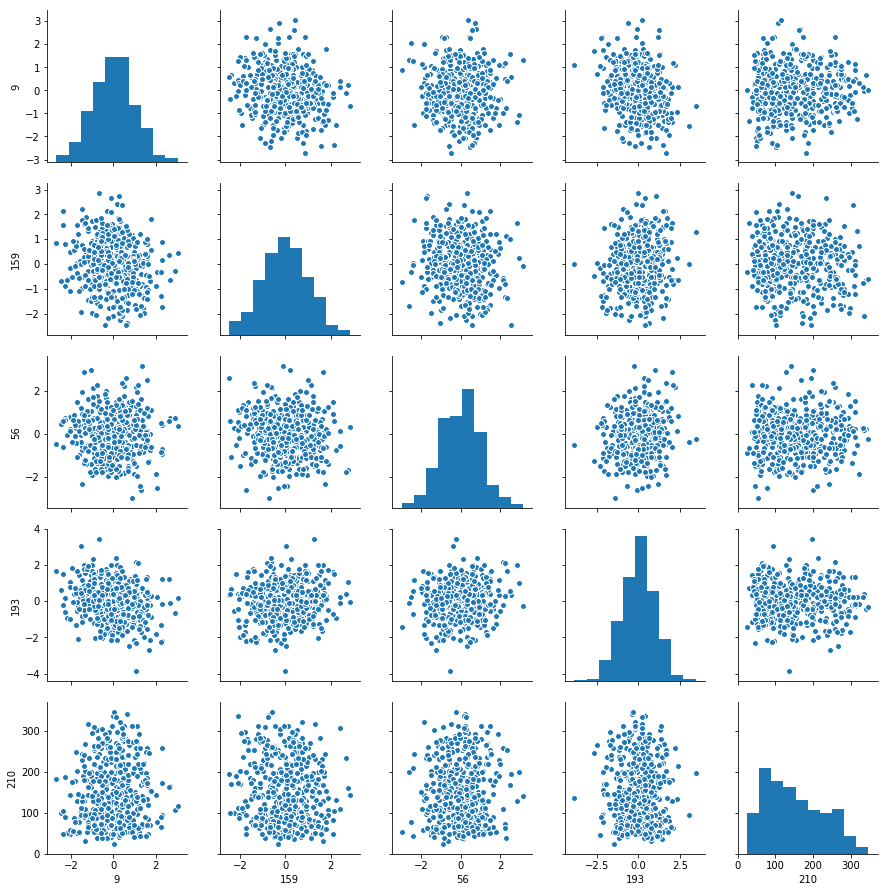

In [6]:
# get random 4 variables and add the Y at the end
random_covars = np.random.randint(0, 210, 4).tolist() + [210]
print("plotting variables " + str(random_covars))
sns.pairplot(df[random_covars])


In [7]:
print(
    "Selon les nuages de point du graphique, les variables sont indépendantes entre. La plupart des variables ne sont pas corrélées avec la variables à expliquer mais parfois on tombe sur une qui est très corrélée."
)


Selon les nuages de point du graphique, les variables sont indépendantes entre. La plupart des variables ne sont pas corrélées avec la variables à expliquer mais parfois on tombe sur une qui est très corrélée.


### (Q3) 
Echantillon d’apprentissage et de test. Créer 2 échantillons : un pour apprendre le modèle Xtrain,
un pour tester le modèle Xtest. On mettra 20% de la base dans l’échantillon ’test’. Donner les tailles
de chacun des 2 échantillons.

In [8]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X_df, Y_df, test_size=0.2)
print(
    "L'échantillon d'apprentissage Xtrain contient {0} points.".format(Xtrain.shape[0])
)
print("L'échantillon de test Xtest contient {0} points.".format(Xtest.shape[0]))


L'échantillon d'apprentissage Xtrain contient 353 points.
L'échantillon de test Xtest contient 89 points.


In [9]:
Xtrain_means = Xtrain.mean().round(3)
print("Xtrain n'est plus centrée")
print(Xtrain_means[Xtrain_means > 0].head())

Xtrain_vars = Xtrain.var().round(2)
print("\n Xtrain n'est plus normalisée")
print(Xtrain_vars[Xtrain_vars != 1].head())


Xtrain n'est plus centrée
2    0.013
3    0.054
4    0.029
7    0.008
8    0.012
dtype: float64

 Xtrain n'est plus normalisée
0    1.02
1    1.04
2    1.05
3    0.98
4    1.02
dtype: float64


### (Q4) 
Donner la matrice de covariance calculée sur Xtrain. Tracer le graphe de la décroissance des valeurs
propres de la matrice de corrélation. Expliquer pourquoi il est légitime de ne garder que les premières
variables de l’ACP. On gardera 60 variables dans la suite.
1

Text(0,0.5,'valeur propre de Cov(X)')

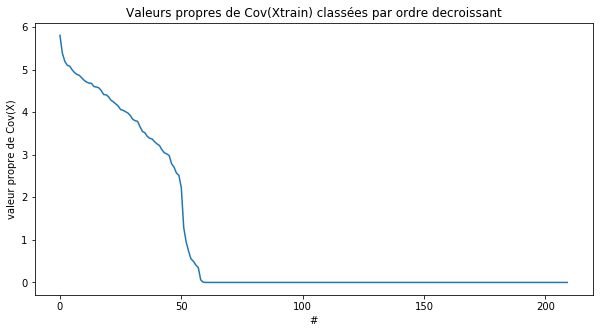

In [10]:
Xcov_eigens = np.linalg.eigvals(Xtrain.cov())
Xcov_eigens.sort()

# Plot eigen vectors
plt.figure(1, figsize=(10, 5))
plt.plot(Xcov_eigens.real[::-1])
plt.title("Valeurs propres de Cov(Xtrain) classées par ordre decroissant", fontsize=12)
plt.xlabel("#")
plt.ylabel("valeur propre de Cov(X)")


Text(0,0.5,'valeur propre de Cov(X)')

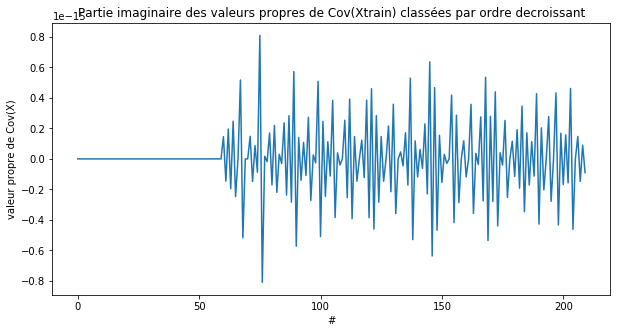

In [11]:
# Plot eigen vectors
plt.figure(2, figsize=(10, 5))
plt.plot(Xcov_eigens.imag[::-1])
plt.title(
    "Partie imaginaire des valeurs propres de Cov(Xtrain) classées par ordre decroissant",
    fontsize=12,
)
plt.xlabel("#")
plt.ylabel("valeur propre de Cov(X)")


In [12]:
print(
    "Les valeurs propres de Cov(Xtrain) au delà des 60 premières sont tous null: {0} ....".format(
        Xcov_eigens.real[::-1][60:63]
    )
)
print("A partir de 60 il y a beaucoup de bruit ce qui explique la partie imaginaire")


Les valeurs propres de Cov(Xtrain) au delà des 60 premières sont tous null: [1.55046255e-15 1.55046255e-15 1.32671335e-15] ....
A partir de 60 il y a beaucoup de bruit ce qui explique la partie imaginaire


On passe par la SVD pour garder que les 60 première variable de PCA.

In [13]:
%%time
U, S, V = np.linalg.svd(Xtrain)
U_trunc = U[:, :60]
V_trunc = V.T[:, :60].T
S_trunc = np.diag(S[:60])


CPU times: user 38.8 ms, sys: 8.03 ms, total: 46.9 ms
Wall time: 126 ms


In [14]:
print(
    "On peut avoir le résulat directement et plsu rapidement avec decomposition.randomized_svd"
)


On peut avoir le résulat directement et plsu rapidement avec decomposition.randomized_svd


In [15]:
%%time
U_trunc2, S_trunc2, V_trunc2 = decomposition.randomized_svd(Xtrain.values, 60)


CPU times: user 31.4 ms, sys: 5.81 ms, total: 37.2 ms
Wall time: 49.8 ms


### (Q5) 
Suivant les observations de la question (Q4), appliquer la méthode de "PCA before OLS" qui
consiste à appliquer OLS avec Y et XtrainVp1:60q
, où Vp1:60q contient les vecteurs propres (associés
aux 60 plus grandes valeurs propres) de la matrice de covariance. Faire une régression linéaire (avec
intercept), puis tracer les valeurs des coefficients (hors intercept). Sur un autre graphique, faire de
même avec la méthode des moindres carrés classique.

Text(0,0.5,'Coefficients du modèle linaire.')

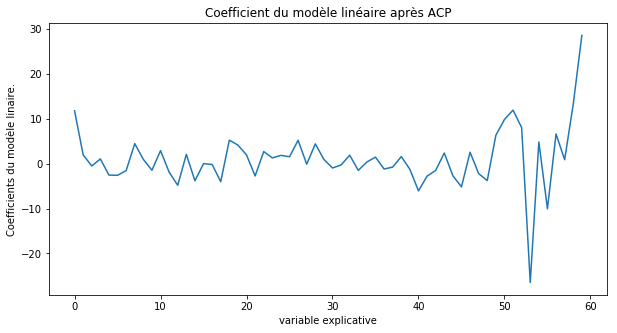

In [16]:
Xtrain_pca = Xtrain @ V_trunc.T
pca_model = LinearRegression(fit_intercept=True)
pca_model.fit(Xtrain_pca, ytrain)

plt.figure(3, figsize=(10, 5))
plt.plot(pca_model.coef_)
plt.title("Coefficient du modèle linéaire après ACP", fontsize=12)
plt.xlabel("variable explicative")
plt.ylabel("Coefficients du modèle linaire.")


Text(0,0.5,'Coefficients du modèle linaire.')

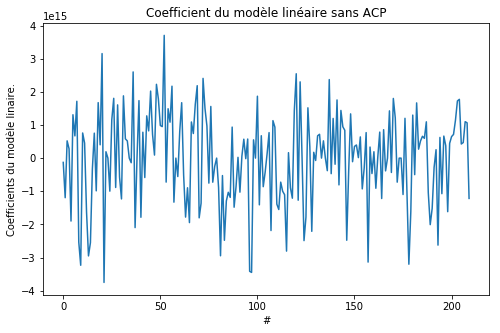

In [17]:
full_model = LinearRegression(fit_intercept=True)
full_model.fit(Xtrain, ytrain)

plt.figure(4, figsize=(8, 5))
plt.plot(full_model.coef_)
plt.title("Coefficient du modèle linéaire sans ACP", fontsize=12)
plt.xlabel("#")
plt.ylabel("Coefficients du modèle linaire.")


### (Q6) 
Donner les valeurs des intercepts pour les 2 régressions précédentes. Donner la valeur moyenne
de la variable Y (sur le train set). Les intercepts des 2 questions sont-ils égaux ? Commenter.
Uniquement pour cette question, centrer et réduire les variables après ACP (de petite dimension).
Faire une régression linéaire (avec
intercept), puis tracer les valeurs des coefficients (hors intercept). Sur un autre graphique, faire de
même avec la méthode des moindres carrés classique.

In [18]:
print("La regression classique donne un intercept de {0}".format(full_model.intercept_))
print("La regression après ACP donne un intercept de {0}".format(pca_model.intercept_))
err = abs(full_model.intercept_ - pca_model.intercept_) * 100 / pca_model.intercept_
print(
    "Les deux intercept sont presque égaux, avec une erreur de {}%".format(
        round(err, 2)
    )
)
print("La moyenne de Y est {0}".format(ytrain.mean()))


La regression classique donne un intercept de 154.4810995042493
La regression après ACP donne un intercept de 153.4016395016072
Les deux intercept sont presque égaux, avec une erreur de 0.7%
La moyenne de Y est 152.1529745042493


Text(0,0.5,'Coefficients du modèle linaire.')

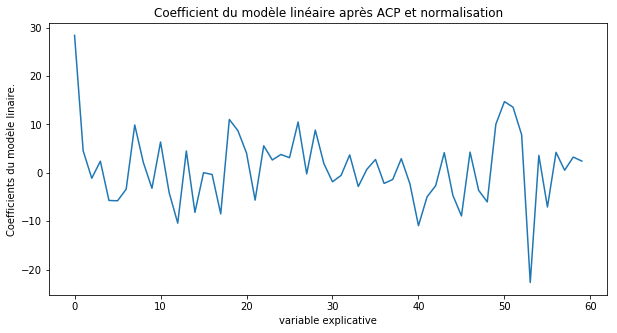

In [19]:
# Normalize Xtrain_pca
pca_scaler = StandardScaler()
pca_scaler.fit(Xtrain_pca)
Xtrain_pca_scaled = pca_scaler.transform(Xtrain_pca)
pca_model_normalized = LinearRegression(fit_intercept=True)
pca_model_normalized.fit(Xtrain_pca_scaled, ytrain)

plt.figure(5, figsize=(10, 5))
plt.plot(pca_model_normalized.coef_)
plt.title("Coefficient du modèle linéaire après ACP et normalisation", fontsize=12)
plt.xlabel("variable explicative")
plt.ylabel("Coefficients du modèle linaire.")


In [20]:
err = abs(pca_model_normalized.intercept_ - ytrain.mean()) * 100 / ytrain.mean()
print(
    "Le nouveau intercept après normaisation est égal à la moyenne de Ytrain: {0} avec une erreur de {1} %.".format(
        round(pca_model_normalized.intercept_, 3), err
    )
)


Le nouveau intercept après normaisation est égal à la moyenne de Ytrain: 152.153 avec une erreur de 0.0 %.


### (Q7) 
Pour les 2 méthodes (OLS et PCA before OLS) : Tracer les résidus de la prédiction sur l’échantillon
test. Tracer leur densité (on pourra par exemple utiliser un histogramme). Calculer le coefficient de
détermination sur l’échantillon test. Calculer le risque de prédiction sur l’échantillon test.

Text(0,0.5,'Résidu')

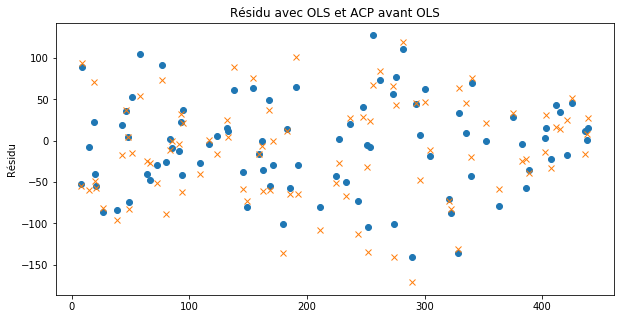

In [21]:
Xtest_pca = Xtest @ V_trunc.T
r_pca = ytest - pca_model.predict(Xtest_pca)
r_ols = ytest - full_model.predict(Xtest)

plt.figure(6, figsize=(10, 5))
plt.plot(r_pca, "o")
plt.plot(r_ols, "x")
plt.title("Résidu avec OLS et ACP avant OLS", fontsize=12)
plt.ylabel("Résidu")


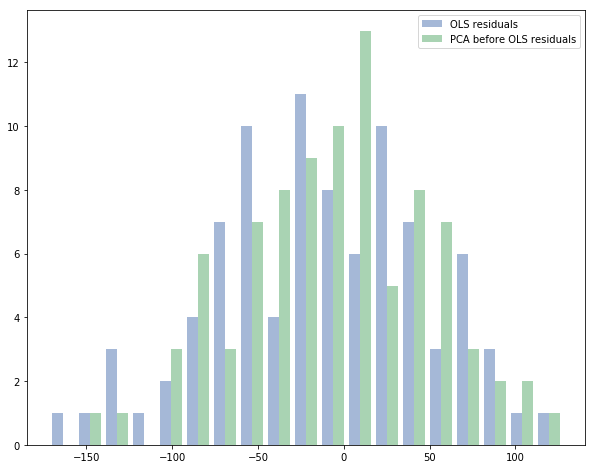

In [22]:
# Plot density of residuals
bins = np.linspace(min(r_ols.min(), r_pca.min()), max(r_ols.max(), r_pca.max()), 20)

plt.style.use("seaborn-deep")
plt.figure(6, figsize=(10, 8))
plt.hist(
    [r_ols, r_pca], bins, alpha=0.5, label=["OLS residuals", "PCA before OLS residuals"]
)
plt.legend(loc="upper right")
# plt.show()


In [23]:
r2_pca = pca_model.score(Xtest_pca, ytest)
print("Le coefficient de correlation de ACP avant OLS est {0}".format(r2_pca))
r2_ols = full_model.score(Xtest, ytest)
print("Le coefficient de correlation de OLS est {0}".format(r2_ols))

risk_pca = r_pca.T @ r_pca / len(ytest)
print(
    "Le risque de prédiction avec ACP avant OLS sur l'échantillon de test est {0}".format(
        risk_pca
    )
)

risk_ols = r_ols.T @ r_ols / len(ytest)
print(
    "Le risque de prédiction avec OLS sur l'échantillon de test est {0}".format(
        risk_ols
    )
)


Le coefficient de correlation de ACP avant OLS est 0.4662237133833024
Le coefficient de correlation de OLS est 0.33885303139375733
Le risque de prédiction avec ACP avant OLS sur l'échantillon de test est 3125.486377935508
Le risque de prédiction avec OLS sur l'échantillon de test est 3871.295701968948


### (Q8) 
Coder la méthode de forward variable sélection. On pourra utiliser la statistique du test de nullité
du coefficient (comme vu en cours). Pour l’instant, on ne met pas de critère d’arret sur la méthode.
C’est à dire que l’on ajoute une variable à chaque étape jusqu’à retrouver la totalité des variables.
Afficher l’ordre de séléction des variables.

In [24]:
cols = df.columns[:-1].copy().tolist()
features = []
X0 = np.ones([len(ytrain), 1])
lr0 = LinearRegression(fit_intercept=True).fit(X0, ytrain)
residuals_0 = ytrain - lr0.predict(X0)
pvals = []


def test_new_feature(new_feature, ytrain_k):
    # New features matrix
    Xtrain_k = Xtrain[[new_feature]].values
    # OLS
    lr_k = LinearRegression()
    lr_k.fit(Xtrain_k, ytrain_k)
    # Compute new predictions and residuals
    ypred_k = lr_k.predict(Xtrain_k)
    residuals_k = ytrain_k - ypred_k
    # Compute error
    theta_k = lr_k.coef_[0]
    MSE = (sum((ytrain_k - ypred_k) ** 2)) / (len(Xtrain_k) - 1 - 1)
    sigma_theta_k = np.sqrt(MSE * (np.linalg.inv(Xtrain_k.T @ Xtrain_k).diagonal()))
    tstat_k = abs(theta_k / sigma_theta_k)
    p_values_k = 2 * (1 - stats.norm.cdf(tstat_k))[0]
    return {
        "feature": new_feature,
        "pvalue": p_values_k,
        "t_stat": tstat_k[0],
        "theta": theta_k,
        "residuals": residuals_k,
    }


def test_new_feature2(new_feature, ytrain_k):
    Xtrain_k = Xtrain[new_feature].values
    slope, intercept, r_value, p_value, std_err = stats.linregress(Xtrain_k, ytrain_k)
    residuals_k = ytrain_k - intercept - slope * Xtrain_k
    return {
        "feature": new_feature,
        "pvalue": p_value,
        "t_stat": slope / std_err,
        "theta": slope,
        "residuals": residuals_k,
    }


# Loop untill all variables taken

residuals = [residuals_0]
y_train_rs = ytrain - lr0.predict(X0)
while len(cols) > 0:
    # For each variable in cols
    rs = [test_new_feature2(col, y_train_rs) for col in cols]
    best_feature = min(rs, key=lambda x: x["pvalue"])
    pvals.append(best_feature["pvalue"])
    features.append(best_feature["feature"])
    cols.remove(best_feature["feature"])
    residuals.append(best_feature["residuals"])
    y_train_rs = best_feature["residuals"]
    # print("best_feature is ", best_feature["feature"], best_feature["pvalue"])
print("Ordre de selection des variables: ", features)


Ordre de selection des variables:  [58, 123, 133, 174, 57, 80, 135, 167, 132, 180, 159, 27, 160, 176, 75, 61, 113, 48, 175, 92, 34, 90, 121, 126, 84, 153, 99, 164, 184, 169, 166, 74, 189, 168, 70, 155, 28, 208, 79, 154, 10, 83, 107, 91, 147, 130, 1, 205, 201, 81, 52, 101, 41, 119, 50, 23, 88, 62, 129, 171, 116, 65, 103, 72, 94, 170, 139, 37, 199, 36, 186, 20, 3, 191, 150, 110, 26, 193, 195, 125, 200, 82, 60, 148, 118, 145, 181, 190, 140, 53, 106, 96, 39, 112, 51, 63, 173, 131, 115, 120, 25, 29, 40, 19, 21, 137, 42, 13, 207, 9, 182, 44, 204, 49, 162, 5, 8, 141, 134, 152, 109, 165, 18, 196, 206, 55, 202, 197, 59, 124, 67, 136, 102, 71, 32, 128, 188, 138, 31, 85, 127, 24, 95, 12, 100, 149, 38, 54, 87, 198, 203, 22, 111, 11, 76, 161, 69, 177, 64, 104, 6, 43, 73, 33, 172, 56, 105, 179, 142, 35, 146, 97, 192, 2, 98, 93, 30, 66, 15, 47, 187, 45, 114, 151, 183, 209, 4, 16, 89, 122, 0, 185, 143, 86, 144, 156, 178, 158, 78, 157, 68, 108, 117, 163, 46, 194, 7, 77, 14, 17]


### (Q9) 
Critère d’arrêt : On décide d’arrêter lorsque la p-valeur dépasse 0.1. Illustrer la méthode en donnant
(i) les 3 graphes des statistiques obtenues lors de la sélection de la 1er, 2eme et 3eme variables (en
abscisse : l’index des variables, en ordonné : la valeur des stats) , (ii) le graphe des 50 premières
p-valeurs (dont chacune est associée à la variable sélectionnée). Sur ce même graphe, on tracera la
ligne horizontale d’ordonnée 0.1. Enfin on donnera la liste des variables sélectionnées.

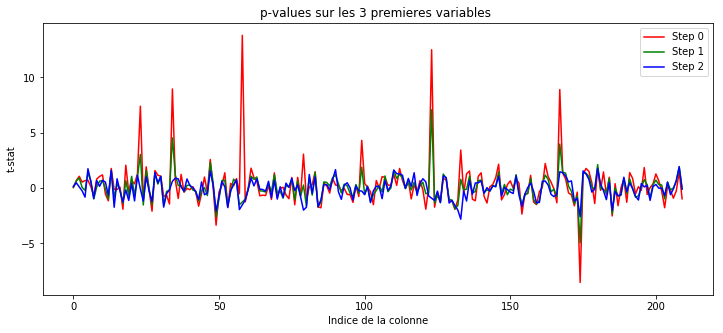

In [25]:
cols = df.columns[:-1].copy().tolist()
features = []
X0 = np.ones([len(ytrain), 1])
lr0 = LinearRegression(fit_intercept=True).fit(X0, ytrain)
residuals_0 = ytrain - lr0.predict(X0)
pvals = []
residuals = [residuals_0]

plt.figure(figsize=(12, 5))
colors = ["r", "g", "b"]
plt.title("p-values sur les 3 premieres variables ", fontsize=12)
plt.xlabel("Indice de la colonne")
plt.ylabel("t-stat")

plot_counter = 0
while len(cols) > 0:
    # For each variable in cols
    rs = [test_new_feature2(col, residuals[-1]) for col in cols]

    if plot_counter < 3:
        rs_df = pd.DataFrame(rs)
        plt.plot(
            rs_df["feature"],
            rs_df["t_stat"],
            color=colors[plot_counter],
            label="Step " + str(plot_counter),
        )

    best_feature = min(rs, key=lambda x: x["pvalue"])
    pvals.append(best_feature["pvalue"])
    features.append(best_feature["feature"])
    cols.remove(best_feature["feature"])
    residuals.append(best_feature["residuals"])
    # print("best_feature is ", best_feature["feature"], best_feature["pvalue"])
    plot_counter = plot_counter + 1
plt.legend()
plt.show()


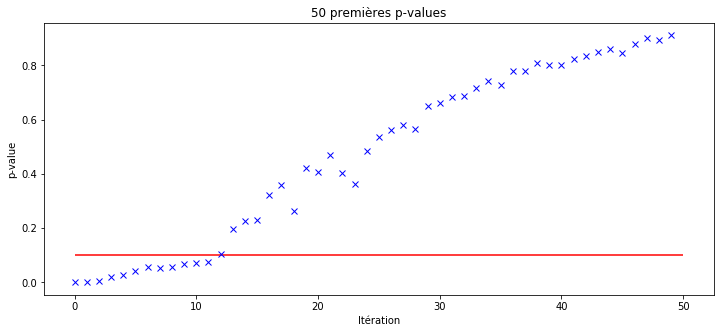

In [26]:
plt.figure(figsize=(12, 5))
colors = ["r", "g", "b"]
plt.title("50 premières p-values", fontsize=12)
plt.xlabel("Itération")
plt.ylabel("p-value")
plt.plot(range(50), pvals[:50], "bx")
plt.hlines(0.1, 0, 50, color="r")


In [27]:
features_nbr = sum(1 for pval in pvals if pval < 0.1)
selected_features = features[:features_nbr]
print("La liste des variables sélectionnée: ", selected_features)


La liste des variables sélectionnée:  [58, 123, 133, 174, 57, 80, 135, 167, 132, 180, 159, 27]


### (Q10) 
Appliquer OLS sur les variables sélectionnées. Donner le risque de prédiction obtenu l’échantillon
test et le comparer à ceux de OLS et PCA before OLS.

In [28]:
Xtrain_selection = Xtrain[selected_features].values
selection_model = LinearRegression(fit_intercept=True).fit(Xtrain_selection, ytrain)

r_selection = ytest - selection_model.predict(Xtest[selected_features].values)
risk_selection = r_selection.T @ r_selection / len(ytest)
print("Le risk aprs sélection de variable est {0}".format(risk_selection))
print(
    "On trouve le même risque que l'OLS sans rien. C'est normal car la sélection de variable n'améliore"
)
print(
    "pas la précision mais améliore le temps de calcule en supprimant les variables inutiles."
)


Le risk aprs sélection de variable est 3021.3592696719015
On trouve le même risque que l'OLS sans rien. C'est normal car la sélection de variable n'améliore
pas la précision mais améliore le temps de calcule en supprimant les variables inutiles.


### (Q11) 
Afin de préparer la validation croisée, séparer l’échantillon train en 4 parties (appelées ”folds”) de
façon aléatoire. On affichera les numéros d’échantillon sélectionnés dans chaque fold.

In [29]:
Xtmp1, Xtmp2, ytmp1, ytmp2 = train_test_split(Xtrain, ytrain, test_size=0.5)
X_folds = [None, None, None, None]
y_folds = [None, None, None, None]
X_folds[0], X_folds[1], y_folds[0], y_folds[1] = train_test_split(
    Xtmp1, ytmp1, test_size=0.5
)
X_folds[2], X_folds[3], y_folds[2], y_folds[3] = train_test_split(
    Xtmp2, ytmp2, test_size=0.5
)


In [30]:
for i in range(4):
    print("Fold {0} contient {1} échantillons.".format(i, len(X_folds[1])))


Fold 0 contient 88 échantillons.
Fold 1 contient 88 échantillons.
Fold 2 contient 88 échantillons.
Fold 3 contient 88 échantillons.


### (Q12) 
Appliquer la méthode de la régression ridge. Pour le choix du paramètre de régularisation, on fera
une validation croisée sur les ”folds” définies lors de la question précédente. A tour de rôle chacune
des ”folds” servira pour calculer le risque de prédiction alors que les autres seront utilisées pour
estimer le modèle. On moyennera ensuite les 4 risques de prédictions. On donnera la courbe du
risque de validation croisée en fonction du paramètre de régularisation (on veillera à bien choisir
l’espace de définition pour le graphe). Donner le paramètre de régularisation optimal et la valeur
du risque sur le test.

In [31]:
alphas = [
    0.0001,
    0.0003,
    0.0006,
    0.001,
    0.003,
    0.006,
    0.01,
    0.03,
    0.06,
    0.1,
    0.3,
    0.6,
    1,
    3,
    6,
    10,
    30,
    60,
    100,
    300,
    600,
    1000,
    3000,
    6000,
]

mean_train_errors = []
mean_fold_errors = []


def get_ridge_error(x_folds, y_folds, alpha):
    err_sum = 0
    num_folds = len(x_folds)
    for k in range(num_folds):
        x_test_k = x_folds[k]
        y_test_k = y_folds[k]

        x_train_k = pd.concat(
            [x_folds[(k + i) % num_folds] for i in range(1, num_folds)]
        )
        y_train_k = pd.concat(
            [y_folds[(k + i) % num_folds] for i in range(1, num_folds)]
        )

        r_lr = Ridge(alpha).fit(x_train_k, y_train_k)
        y_pred_k = r_lr.predict(x_test_k)
        err_sum += (y_test_k - y_pred_k).T @ (y_test_k - y_pred_k) / len(y_pred_k)
    return {"err": err_sum / num_folds, "alpha": alpha}


In [32]:
results = [get_ridge_error(X_folds, y_folds, alpha) for alpha in alphas]
best_result = min(results, key=lambda x: x["err"])
best_alpha = best_result["alpha"]

print("Le meilleur alpha est alpha = {0}".format(best_alpha))


Le meilleur alpha est alpha = 30


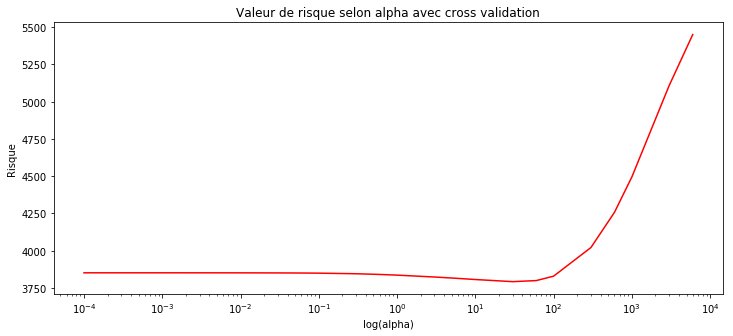

In [33]:
res_df = pd.DataFrame(results)
plt.figure(figsize=(12, 5))
plt.plot(res_df["alpha"], res_df["err"], "r-")
plt.title("Valeur de risque selon alpha avec cross validation", fontsize=12)
plt.xlabel("log(alpha)")
plt.ylabel("Risque")
plt.xscale("log")

plt.show()


In [34]:
rg_lr = Ridge(best_alpha).fit(Xtrain, ytrain)
y_ridge_pred = rg_lr.predict(Xtest)
risk_ridge = (ytest - y_ridge_pred).T @ (ytest - y_ridge_pred) / len(ytest)

print(
    "Risque de prediction avec Ridge et meilleur alpha : {0}".format(round(risk_ridge))
)


Risque de prediction avec Ridge et meilleur alpha : 3135.0


### (Q13) 
A l’aide de la fonction lassoCV de sklearn, choisir le paramètre de régularisation du LASSO. Donner
le risque de prédiction associé.

In [35]:
lasso_lr = LassoCV().fit(Xtrain, ytrain)
lasso_best_alpha = lasso_lr.alpha_

print(
    "Le meilleur alpha de régulation Lasso est : {0}".format(round(lasso_best_alpha, 2))
)

y_pred_lasso = lasso_lr.predict(Xtest)
risk_lasso = (ytest - y_pred_lasso).T @ (ytest - y_pred_lasso) / len(ytest)

print("Risque de prediction avec Lasso : {0}".format(round(risk_lasso)))


Le meilleur alpha de régulation Lasso est : 6.33
Risque de prediction avec Lasso : 3038.0


### (Q14)
Donner les variables selectionées par le lasso. Combien y-en a t-il ? Appliquer la méthode OLS aux
variables sélectionnées. Cette méthode est appelé Least-square LASSO.

In [36]:
selected_lasso_features = np.nonzero(lasso_lr.coef_)[0].tolist()
print(
    "Il y a {0} variables selectionnées par Lasso: {1}".format(
        len(selected_lasso_features), selected_lasso_features
    )
)


Il y a 7 variables selectionnées par Lasso: [49, 53, 58, 123, 167, 174, 185]


In [37]:
ols_lasso_lr = LinearRegression().fit(Xtrain[selected_lasso_features].values, ytrain)
y_pred_lasso_ols = ols_lasso_lr.predict(Xtest[selected_lasso_features].values)
risk_lasso_ols = (ytest - y_pred_lasso_ols).T @ (ytest - y_pred_lasso_ols) / len(ytest)

print(
    "Risque de prediction OLS après selection Lasso : {0}".format(round(risk_lasso_ols))
)


Risque de prediction OLS après selection Lasso : 3237.0


### (Q15)
Cette dernière question est un question d’ouverture vers une approche non-linéaire. En utilisant les
variables séléctionées par le LASSO (Q13) ou par la méthode forward (Q9), mettre au point une
méthode de regression non-linéaire. On apprendra les différents paramètres par validation croisée
et l’on donnera la valeur du risque de prédiction calculé sur l’échantillon test. Des performances
moindres par rapport à OLS peuvent se produire. Commenter.

In [38]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svr_rbf = SVR(kernel="rbf", C=1e3, gamma=0.1)

y_rbf = svr_rbf.fit(Xtrain[selected_lasso_features].values, ytrain).predict(
    Xtest[selected_lasso_features].values
)
risk_rbf = (ytest - y_rbf).T @ (ytest - y_rbf) / len(ytest)

print("Risque de prediction SVM avec noyeau RBF : {0}".format(round(risk_rbf)))


Risque de prediction SVM avec noyeau RBF : 3578.0


In [39]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

parameters = {"kernel": ("linear", "rbf"), "C": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
svr = SVR()
clf = GridSearchCV(svr, parameters, cv=5)

y_rbf = clf.fit(Xtrain[selected_lasso_features].values, ytrain).predict(
    Xtest[selected_lasso_features].values
)
risk_rbf = (ytest - y_rbf).T @ (ytest - y_rbf) / len(ytest)

print("Cross validation donne SVM avec les paramètre : {0}".format(clf.best_params_))
print("Risque de prediction SVM CV : {0}".format(round(risk_rbf)))


Cross validation donne SVM avec les paramètre : {'C': 1, 'kernel': 'linear'}
Risque de prediction SVM CV : 3251.0


In [40]:
print("SVM donne meilleur résulat que OLS mais moins bon que LASSO")


SVM donne meilleur résulat que OLS mais moins bon que LASSO
